In [198]:
#dataset taken from https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

M = {'January':1,
 'February':2,
 'March':3,
 'April':4,
 'May':5,
 'June':6,
 'July':7,
 'August':8,
 'September':9,
 'October':10,
 'November':11,
 'December':12}

BOOL = {1:'YES', 0:'NO'}

def axis_label(x = '', y = ''):
    plt.xlabel(x)
    plt.ylabel(y)

data = pd.read_csv("hotel_bookings.csv")
data.info()

data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


# Data Dictionary

* hotel: Type of hotel(Resort hotel or City Hotel)

* is_canceled: Value indicating if the booking was canceled (1) or not (0)

* lead_time: Number of days that elapsed between the entering date of the booking into the PMS and the arrival date

* arrival_date_year: Year of arrival date

* arrival_date_month: Month of arrival date

* arrival_date_week_number: Week number of year for arrival date

* arrival_date_day_of_month: Day of arrival date

* stays_in_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

* stays_in_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

* adults: Number of adults

* children: Number of children

* babies: Number of babies

* meal: Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner)

* country: Country of origin. Categories are represented in the ISO 3155–3:2013 format

* market_segment: Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”

* distribution_channel: Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”

* is_repeated_guest: Value indicating if the booking name was from a repeated guest (1) or not (0)

* previous_cancellations: Number of previous bookings that were cancelled by the customer prior to the current booking

* previous_bookings_not_canceled: Number of previous bookings not cancelled by the customer prior to the current booking

* reserved_room_type: Code of room type reserved. Code is presented instead of designation for anonymity reasons.

* assigned_room_type: Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.

* booking_changes: Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation

* deposit_type: Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay.

* agent: ID of the travel agency that made the booking

* company: ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons

* days_in_waiting_list: Number of days the booking was in the waiting list before it was confirmed to the customer

* customer_type: Type of booking, assuming one of four categories: Contract - when the booking has an allotment or other type of contract associated to it; Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking

* adr: Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights

* required_car_parking_spaces: Number of car parking spaces required by the customer

* total_of_special_requests: Number of special requests made by the customer (e.g. twin bed or high floor)

* reservation_status: Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why

* reservation_status_date: Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel

In [170]:
#total duplicated rows
print(data.duplicated().sum())

#check duplicated rows
data[data.duplicated()]

31994


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,No Deposit,250.0,NaN,0,Transient,84.67,0,1,Check-Out,2015-07-07
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,...,No Deposit,250.0,NaN,0,Transient,137.00,0,1,Check-Out,2015-07-07
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,...,No Deposit,240.0,NaN,0,Transient,97.00,0,0,Canceled,2015-07-01
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,...,No Deposit,240.0,NaN,0,Transient,109.80,0,3,Check-Out,2015-07-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2,...,No Deposit,9.0,NaN,0,Transient,126.00,0,2,Check-Out,2017-09-03
119352,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119353,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119354,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03


In [171]:
#check which columns have empty values
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [172]:
#drop duplicates and map month into numerical values
data.drop_duplicates(inplace=True)
data.arrival_date_month = data.arrival_date_month.map(M)


In [173]:
#fill missing values when possible

#replace agent with boolean, since the only useful factor would be the use of agent or not.
data.loc[data.agent.isnull() == False, 'agent'] = 'YES'
data.agent.fillna('NO', inplace=True)

#Fill empty countries with unknown
data.country.fillna('UNKNOWN', inplace=True)

#Fill empty children cells with 0
data.children.fillna(0, inplace=True)

#some rows market segment or distribution channel is given as corporate where the company row is null
#fill these null values in company column and replace it with boolean
data.loc[((data.market_segment=='Corporate') | (data.distribution_channel=='Corporate')) & (data.company.isnull()),'company']='YES'
data.loc[data.company.isnull()==False,'company']='YES'
#fill the remaining empty cells assuming they are paid personally
data.company.fillna('NO', inplace=True)


In [174]:
#check unique values of each columns
data.nunique()


hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            178
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                                2
company                              2
days_in_waiting_list     

In [175]:
#check if there are still missing values
data.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [176]:
#change columns to correct datatype

data.children = data.children.astype(int)
data.reservation_status_date = data.reservation_status_date.astype('datetime64')

data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87396 non-null  object        
 1   is_canceled                     87396 non-null  int64         
 2   lead_time                       87396 non-null  int64         
 3   arrival_date_year               87396 non-null  int64         
 4   arrival_date_month              87396 non-null  int64         
 5   arrival_date_week_number        87396 non-null  int64         
 6   arrival_date_day_of_month       87396 non-null  int64         
 7   stays_in_weekend_nights         87396 non-null  int64         
 8   stays_in_week_nights            87396 non-null  int64         
 9   adults                          87396 non-null  int64         
 10  children                        87396 non-null  int32         
 11  b

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,...,No Deposit,NO,NO,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,...,No Deposit,NO,NO,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,...,No Deposit,NO,NO,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,...,No Deposit,YES,YES,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,No Deposit,YES,NO,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [177]:
#check for corelation
data.corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.184806,0.088030,0.003708,0.001443,0.005328,0.060191,0.082928,0.081816,0.067369,-0.020543,-0.089643,0.051468,-0.052154,-0.093644,0.004464,0.127986,-0.184206,-0.120545
lead_time,0.184806,1.000000,0.139135,0.106169,0.101150,0.009866,0.235145,0.310129,0.140493,0.028650,-0.003614,-0.147003,0.005375,-0.078931,0.077028,0.132152,0.023564,-0.086541,0.034240
arrival_date_year,0.088030,0.139135,1.000000,-0.499887,-0.514228,-0.010023,0.005144,0.003645,0.038619,0.041158,-0.023334,0.024343,-0.054212,0.027256,0.008604,-0.027939,0.176088,-0.039807,0.064268
arrival_date_month,0.003708,0.106169,-0.499887,1.000000,0.995084,0.000783,0.027117,0.031735,0.027101,0.013645,0.014114,-0.037733,0.007542,-0.021716,0.011734,0.012759,0.103481,0.007317,0.049582
arrival_date_week_number,0.001443,0.101150,-0.514228,0.995084,1.000000,0.093594,0.026868,0.027801,0.024362,0.013450,0.014260,-0.036860,0.007199,-0.020819,0.011902,0.013843,0.098279,0.008946,0.046599
arrival_date_day_of_month,0.005328,0.009866,-0.010023,0.000783,0.093594,1.000000,-0.017803,-0.028190,-0.001125,0.015821,-0.000393,-0.004178,-0.008538,0.000152,0.006307,0.006588,0.022591,0.009167,-0.001651
stays_in_weekend_nights,0.060191,0.235145,0.005144,0.027117,0.026868,-0.017803,1.000000,0.555552,0.088284,0.028561,0.013668,-0.106948,-0.020636,-0.056653,0.050316,-0.031680,0.038972,-0.042920,0.032396
stays_in_week_nights,0.082928,0.310129,0.003645,0.031735,0.027801,-0.028190,0.555552,1.000000,0.095577,0.030479,0.016009,-0.113543,-0.018781,-0.058503,0.085044,0.001905,0.053298,-0.044303,0.037823
adults,0.081816,0.140493,0.038619,0.027101,0.024362,-0.001125,0.088284,0.095577,1.000000,0.023712,0.016640,-0.171714,-0.042097,-0.120914,-0.048061,-0.015740,0.248999,0.007802,0.112772
children,0.067369,0.028650,0.041158,0.013645,0.013450,0.015821,0.028561,0.030479,0.023712,1.000000,0.017423,-0.045651,-0.019208,-0.029423,0.031313,-0.020419,0.326293,0.036332,0.044596


In [178]:
#compare cancellations in distinct month
cancelation_per_month = data.groupby(['arrival_date_year', 'arrival_date_month', 'is_canceled'], as_index=False).agg(
    total = pd.NamedAgg(column='is_canceled', aggfunc = 'count'),
)
cancelation_per_month.is_canceled = cancelation_per_month.is_canceled.map(BOOL)
cancelation_per_month.rename(columns = {'is_canceled':'Canceled?'}, inplace = True)

print(cancelation_per_month)

    arrival_date_year  arrival_date_month Canceled?  total
0                2015                   7        NO   1162
1                2015                   7       YES    512
2                2015                   8        NO   1882
3                2015                   8       YES    571
4                2015                   9        NO   2273
5                2015                   9       YES    566
6                2015                  10        NO   2260
7                2015                  10       YES    440
8                2015                  11        NO   1422
9                2015                  11       YES    243
10               2015                  12        NO   1610
11               2015                  12       YES    372
12               2016                   1        NO   1548
13               2016                   1       YES    301
14               2016                   2        NO   2278
15               2016                   2       YES    5

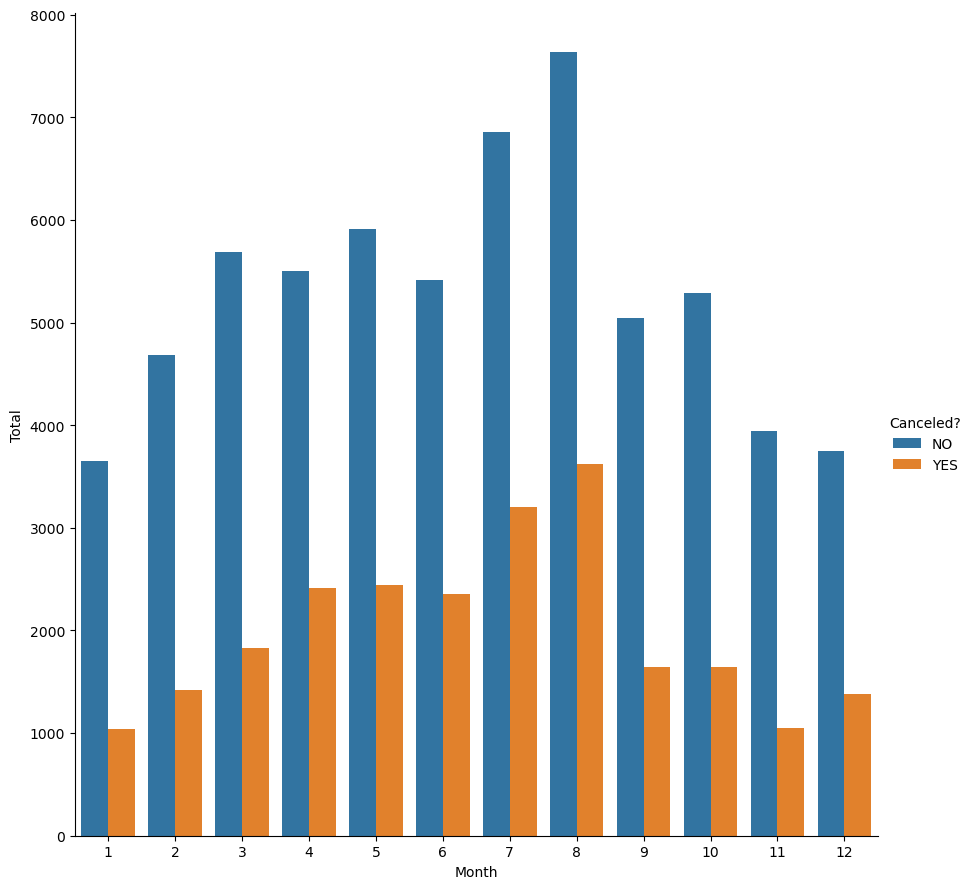

In [255]:
sns.catplot(kind = 'bar', data = cancelation_per_month, x='arrival_date_month', y='total', hue='Canceled?', estimator=sum, ci=None, height=9)
axis_label(x = 'Month', y = 'Total')

plt.show()


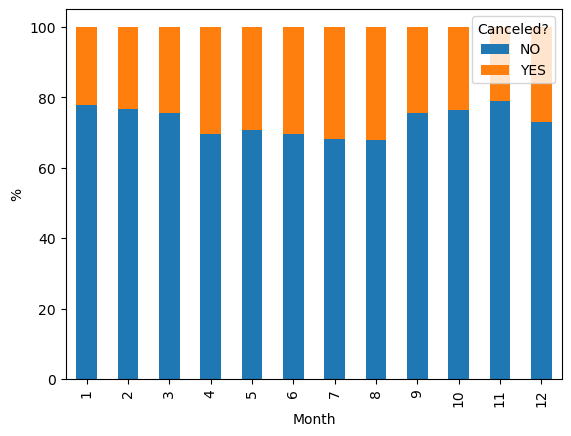

In [257]:
cancelation_per_month['proportion'] = cancelation_per_month.groupby('arrival_date_month', as_index=False)['total'].transform(lambda x: x/x.sum() * 100)

cancelation_per_month.groupby(['arrival_date_month', 'Canceled?'], as_index=False).agg(
    proportion = pd.NamedAgg(column='proportion', aggfunc='sum')
).pivot(index= 'arrival_date_month',columns = 'Canceled?', values = 'proportion').plot(kind = 'bar', stacked = True)

axis_label(x = 'Month', y = '%')

plt.show()

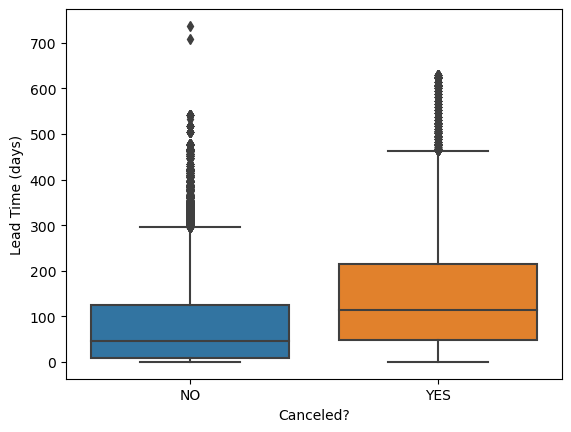

lead_time                                                        
                count        mean         std  min   25%    50%    75%    max
is_canceled                                                                  
0             75166.0   79.984687   91.109888  0.0   9.0   45.0  124.0  737.0
1             44224.0  144.848815  118.624829  0.0  48.0  113.0  214.0  629.0

In [208]:
sns.boxplot(data = data, x= data.is_canceled.map(BOOL),y = 'lead_time')
axis_label(x = "Canceled?", y='Lead Time (days)')

plt.show()

data[['is_canceled', 'lead_time']].groupby('is_canceled').describe()



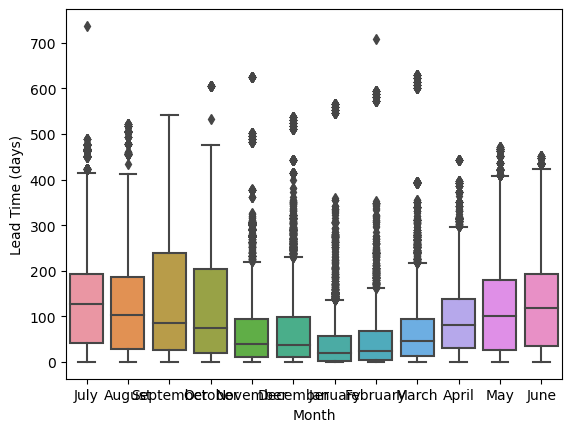

In [209]:
sns.boxplot(data = data, x='arrival_date_month', y = 'lead_time')
axis_label(x="Month", y='Lead Time (days)')

plt.show()